# ****Before We Begin****:

If you liked my work, please upvote this kernel since it will keep me motivated to perform more in-depth reserach towards this subject and will look for more efficient ways so that our models are able to detect more accurately both survived and non-survived people. For more kernel please follow me and any questions please mention below discussion.

# **Predicting cancelations**

It would be nice for the hotels to have a model to predict, When acutally people willing to spend time on vacation. Based on those statstical insights hotel will do their arrangements and offers to peoples.

This can help a hotel to plan things like personel and food requirements and room charges based on demand rate...

Maybe some hotels also use such a model to offer more rooms than they have to make more money... who knows...

# ****Table of content****:

**1. Data Preprocessing**
* Importing Dataset
* Descriptive Statistical Analysis
* Descriptive Statistical Visualisation Analysis
* Visualisation Each Attribute Using Seaborn

**2. Feature Engineering**
* Imputation or Data Cleaning
* Label Encoder
* OneHotEncoder
* Handling Outliers
* Converting Imbalance Dataset to Balanced Dataset
* Binning
* Log Transformation
* Feature Scaling
* Feature Split

**3. EDA (Extraordinary Data Analysis)**

**4. Data Visualisation**
* Scatter Plot
* Box Plot
* Violin Plot
* Heatmap plot
* boxen Plot
* pairwise Relationship plot

**5. Feature Selection**

*  Univariate Selection
*  Feature Importance
*  Correlation Matrix With HeatMap
*  Principal Component Analysis (PCA)
*  Discrimenent Component Analysis (DCA)

**6. Model Selection**

*  Model Selection Using Spot Check and Compare Algorithms Without Feature Scaling
*  Model Selection Using Spot Check and Compare Algorithms With Feature Scaling
*  Regularization Hyper Parameter Tunning For 
*  Ensemble Algorithms (Bagging and Boosting Algorithms)
*  Regularization Hyper Parameter Tunning For 
*  Regularization Hyper Parameter Tunning For 
*  Regularization Hyper Parameter Tunning For 
*  Regularization Hyper Parameter Tunning For 
*  Algorithm For.

I would like to request all viwers, If you willing to know more details about each technique please refer my below kernel.

https://www.kaggle.com/arunkumarpyramid/titanic-survived-classification-and-deep-learning

# ****1. Data Preprocessing****

# ****Importing Dataset****

As we already know we spend almost 75% of our time to preprocess our dataset to extract good bussiness insights.. Those insights will leads us to great predictions on both training and test sets. Then we can push our model to production to handle real world data.

In [1]:
# Importing the dataset
import pandas as pd
import warnings

warnings.simplefilter('ignore')

dataset = pd.read_csv("hotel_bookings.csv")

# **Descriptive Statistical Analysis**

The dataset variable itself is a dictionary, so you can check for its keys using the .keys() method.

In [2]:
dataset.keys()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

You can easily check for its shape by using the dataset.shape attribute, which will return the size of the dataset.

In [3]:
dataset.shape

(119390, 32)

As you can see it returned (119390, 32), that means there are 119390 rows of data with 32 columns. Now, if you want to know what the 32 columns.

The description of the dataset is available in the dataset itself. You can take a look at it using .Describe().

In [4]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


As per above outcome statistical describe across all columns, we can identify that mean and std values are not in the same scale. So we need to make sure that feature scaling is important to get better accurate predictions

Run the .info() method on your DataFrame to get useful information about the data.

In [5]:
# Describe the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

Turns out that this dataset has 4 float column attributes, 16 integer column attributes and 12 object column attributes.

# **Descriptive Statistical Visualisation Analysis**

# ****a. Histogram Plot****

In [6]:
# importing Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sb

Visualizing all attribute from dataset using histogram plot. Which it will provide breif overview about non-object attributes and exculde's object attribute columns. we all know object cant be plot.

Use histograms when you have continuous measurements and want to understand the distribution of values and look for outliers. These graphs take your continuous measurements and place them into ranges of values known as bins. Each bin has a bar that represents the count or percentage of observations that fall within that bin.

**Histograms and the Central Tendency**

Use histograms to understand the center of the data. In the histogram below, you can see that the center is near 50. Most values in the dataset will be close to 50, and values further away are rarer. The distribution is roughly symmetric and the values fall between approximately 40 and 64.

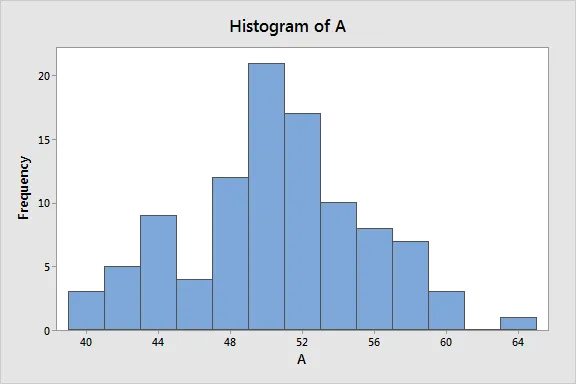
**bins is the perfect parameter, that it will divide entire values in bins amount intervals ( Suppose if we set 20 bins that means complete attribute values splits 20 intervel from starting to ending.**

**Histograms and Skewed Distributions**

Histograms are an excellent tool for identifying the shape of your distribution. So far, we’ve been looking at symmetric distributions, such as the normal distribution. However, not all distributions are symmetrical. You might have nonnormal data that are skewed.

The shape of the distribution is a fundamental characteristic of your sample that can determine which measure of central tendency best reflects the center of your data. Relatedly, the shape also impacts your choice between using a parametric or nonparametric hypothesis test. In this manner, histograms are informative about the summary statistics and hypothesis tests that are appropriate for your data.

For skewed distributions, the direction of the skew indicates which way the longer tail extends.

**For right-skewed distributions, the long tail extends to the right while most values cluster on the left, as shown below. These are real data from a study I conducted.**

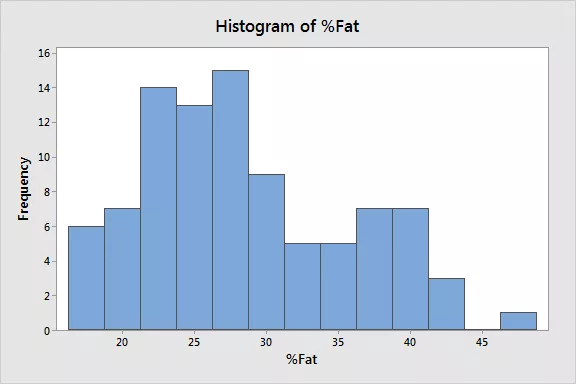

**Conversely, for left-skewed distributions, the long tail extends to the left while most values cluster on the right.**
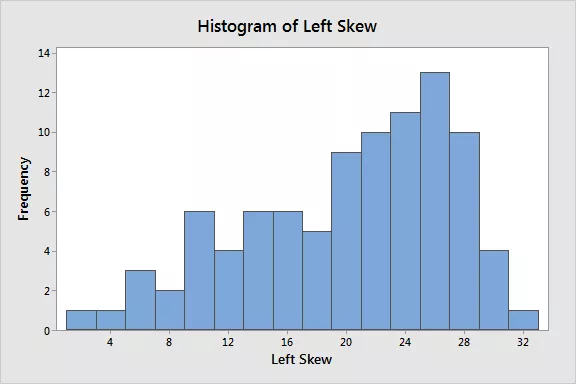

****For more information about histogram technique please refer to this link   https://statisticsbyjim.com/basics/histograms/****

# Histogram each parameter requirement

DataFrame.hist(data, column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, backend=None, **kwargs)

data --- data should be our dataframe assined name ('dataset')

bins --- splits continues values into range of intervels, we can see above figure like different "poles" ('20').

column -- Not much required parameter keep default as non

by --- If we want to plot our histogram into groups like a,b,c groups we need to use "by" parameter

grid -- If grid is True then lines will be visible inside each plot no False no lines will be visible

xlabelsize --- If specified changes the x-axis label size

xrot --- Rotation of x axis labels. For example, a value of 90 displays the x labels rotated 90 degrees clockwise.

ylabelsize --- If specified changes the y-axis label size.

yrot --- Rotation of y axis labels. For example, a value of 90 displays the y labels rotated 90 degrees clockwise.

ax --- Matplotlib axes object, The axes to plot the histogram on.

sharex  ---  whether we want to share x-axis common to all the histogram subplots then we should make it as "True" else "False". If              you want to check by changing sharex parameter as true and false

sharey  ---  whether we want to share y-axis common to all the histogram subplots then we should make it as "True" else "False"

figsize --- how much figure size we want. whether low rate or high rate (ex. lowvalue means zoom out and highvalue means zoom in ),             check values from figsize=min (3,3) to (20,20)------ max..(width, height) in inches

layout  --- means how many subplot should be. (ex: (3,3) means 3*3 matrix manner if we increase to (5,5) then it is 5*5 matrix)

backend --- Ignore

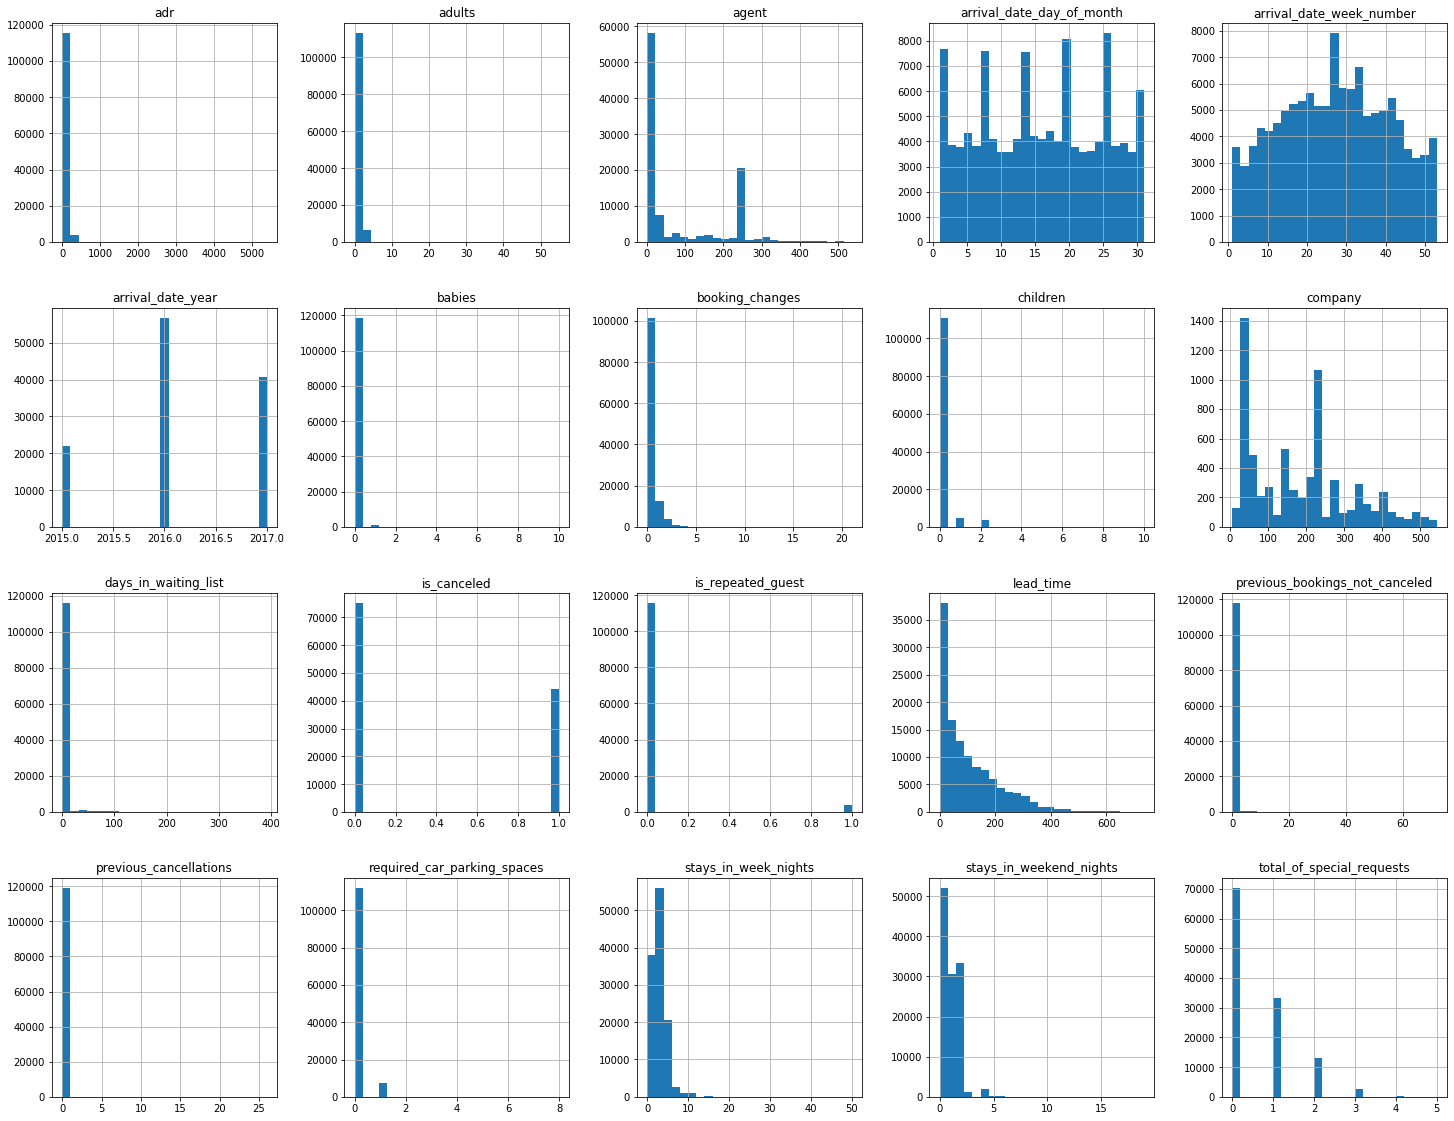

In [7]:
dataset.hist(layout=(5,5),bins=25,figsize=(25,25),sharex=False,sharey=False,grid=True)
plt.show()

As per above visuval plot. we get know we have different kind of distributions to understand more about distribution we are going to another technique called density plot

# ****b. Density Plot****

A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. The peaks of a Density Plot help display where values are concentrated over the interval.

An advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used (each bar used in a typical histogram). 

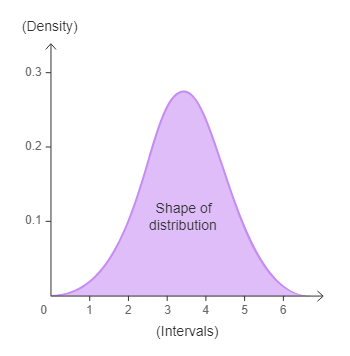


# Plot Each Attribute and Requirements

DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)


kind ---- This parameter accepts string value and what kind of plot we want to view for our dataset like              
          ('line','bar','hist','bar','box','density','scatter')

ax --- matplot paramter we can use this paramter if we are working on matlab tool as adjust x-axis

subplots --- subplots required or not by making subplots as True or False

sharex --- whether we want to share x-axis common to all the histogram subplots then we should make it as "True" else "False". If you want to check by changing sharex parameter as true and false

sharey --- whether we want to share y-axis common to all the histogram subplots then we should make it as "True" else "False"

layout --- means how many subplot should be. (ex: (3,3) means 33 matrix manner if we increase to (5,5) then it is 55 matrix)

grid -- If grid is True then lines will be visible inside each plot and If False no lines will be visible

figsize --- This parameter used to mention, how much contrest image plot should be....(width, height) in inches

use_index --- This parameter used to mention, ticks in each index numbers like ( 1- up one tick line in axis) if it is False no line               Would be visible

title --- This parameter used to perform title of each plots we can give as single string and for subplots  we can assign as a list           of names. if we make title as None then it will take default column names from our dataset

legend --- Itw will display the subplots axis names like (- name we mention) in grid area.

style --- this parameter used in matlab tool.

Remaining parameter doest required to customize the default values... So we are going ahead

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DFE0BC6C8>,
      dtype=object)

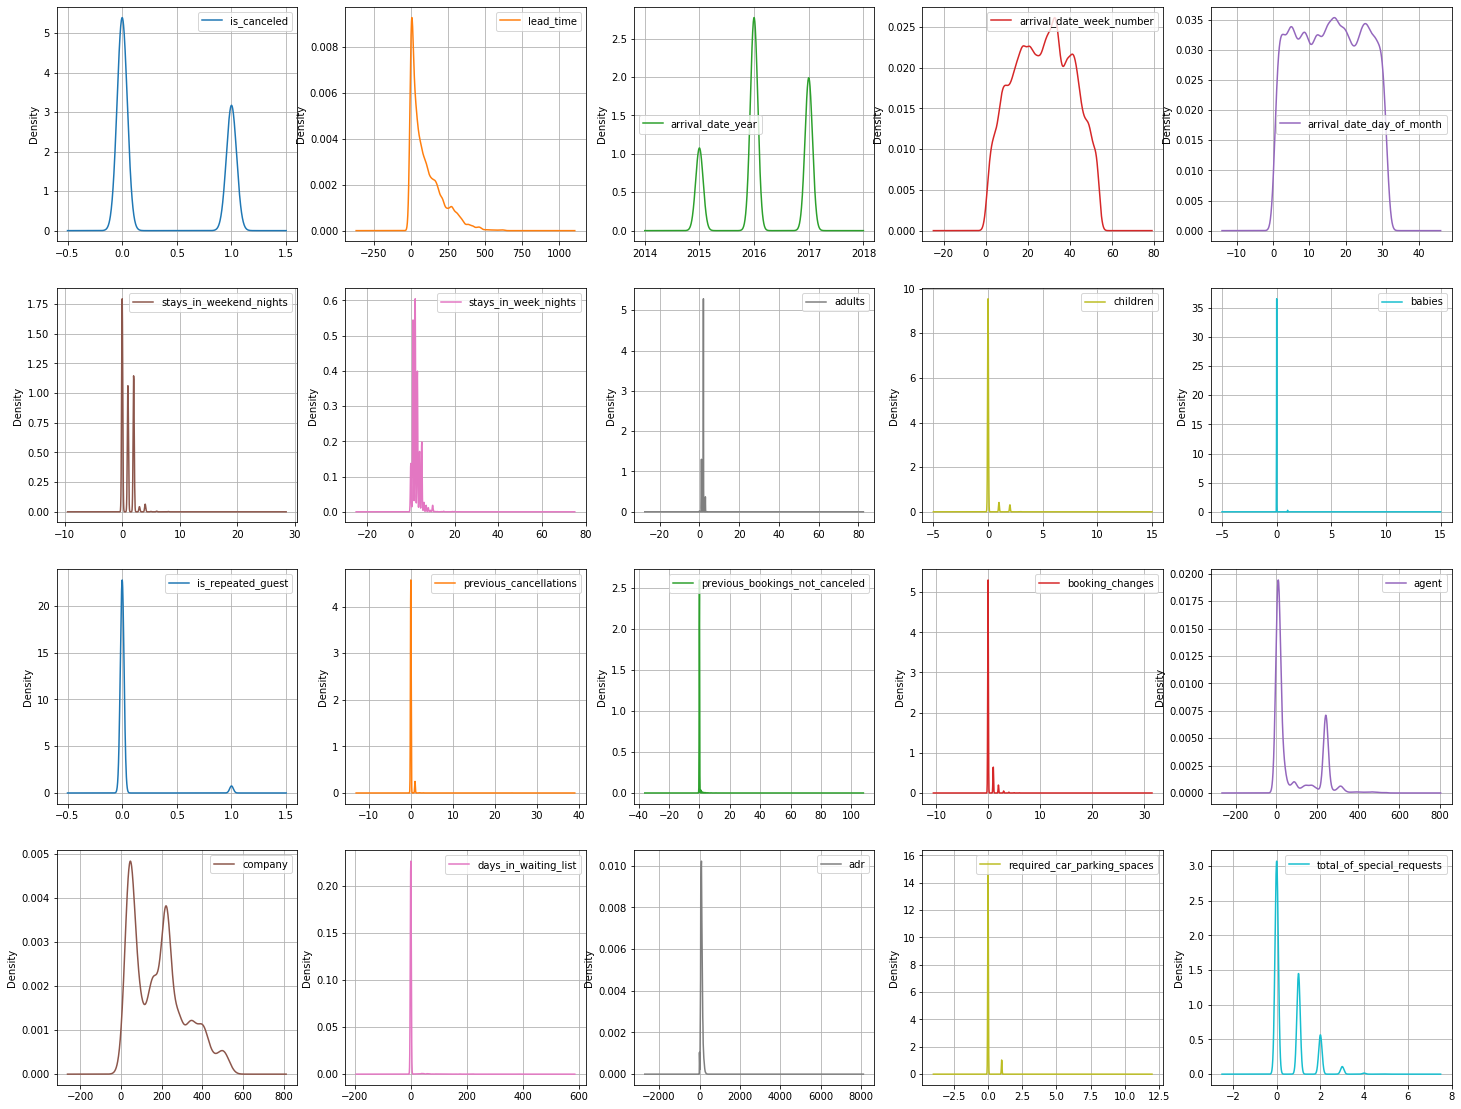

In [8]:
dataset.plot(kind='density',subplots=True,layout=(5,5),figsize=(25,25),grid=True,use_index=False,sharex=False,sharey=False)

As per above density plot its clear that all attributes having different kind of ditribution. Now lets check some random attribute visualisation with seaborn plot

# **Visualisation Each Attribute Using Seaborn**

# **Seaborn**

Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

Seaborn uses matplotlib to draw plots. Many tasks can be accomplished with only seaborn functions, but further customization might require using matplotlib directly. This is explained in more detail below. For interactive work, it’s recommended to use a Jupyter/IPython interface in matplotlib mode, or else you’ll have to call matplotlib.pyplot.show() when you want to see the plot.
 
There is just something extraordinary about a well-designed visualization. The colors stand out, the layers blend nicely together, the contours flow throughout, and the overall package not only has a nice aesthetic quality, but it provides meaningful insights to us as well.

This is quite important in data science where we often work with a lot of messy data. Having the ability to visualize it is critical for a data scientist. Our stakeholders or clients will more often than not rely on visual cues rather than the intricacies of a machine learning model.

There are plenty of excellent Python visualization libraries available, including the built-in matplotlib. But seaborn stands out for me. It combines aesthetic appeal seamlessly with technical insights, as we’ll soon see.


It gives us the capability to create amplified data visuals. This helps us understand the data by displaying it in a visual context to unearth any hidden correlations between variables or trends that might not be obvious initially. Seaborn has a high-level interface as compared to the low level of Matplotlib.

**Visualizing statistical relationships**

A statistical relationship denotes a process of understanding relationships between different variables in a dataset and how that relationship affects or depends on other variables.

Here, we’ll be using seaborn to generate the below plots:

1. Scatter plot
2. SNS.relplot
3. Hue plot

I have picked the ‘Predict the number of upvotes‘ project for this. So, let’s start by importing the dataset in our working environment:


df = pd.read_csv(r"train.csv")
df.head()

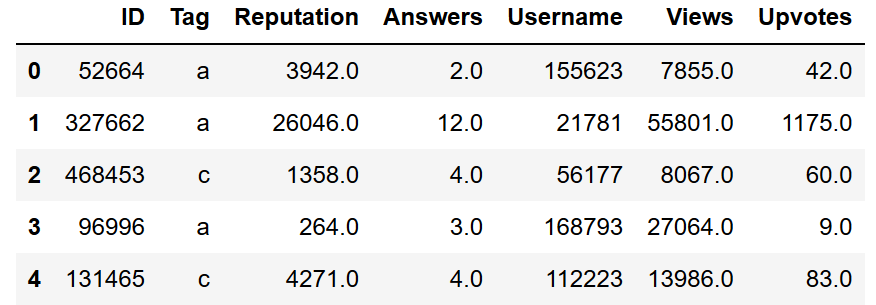

# **Scatterplot using Seaborn**

A scatterplot is perhaps the most common example of visualizing relationships between two variables. Each point shows an observation in the dataset and these observations are represented by dot-like structures. The plot shows the joint distribution of two variables using a cloud of points.

To draw the scatter plot, we’ll be using the relplot() function of the seaborn library. It is a figure-level role for visualizing statistical relationships. By default, using a relplot produces a scatter plot:

1. sns.relplot(x="Views", y="Upvotes", data = df)

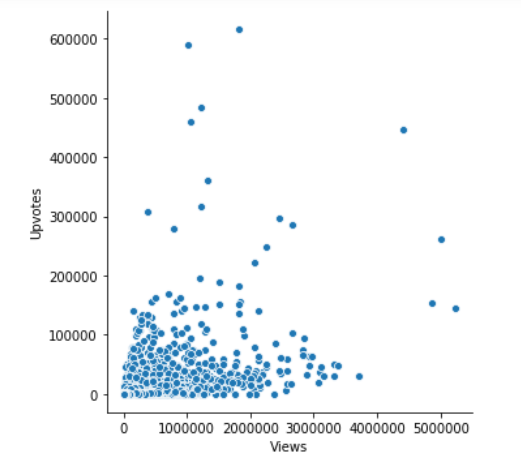

# **SNS.relplot using Seaborn**

SNS.relplot is the relplot function from SNS class, which is a seaborn class that we imported above with other dependencies.

The parameters – x, y, and data – represent the variables on X-axis, Y-axis and the data we are using to plot respectively. Here, we’ve found a relationship between the views and upvotes.

Next, if we want to see the tag associated with the data, we can use the below code:

1. sns.relplot(x="Views", y="Upvotes", hue = "Tag", data = df)

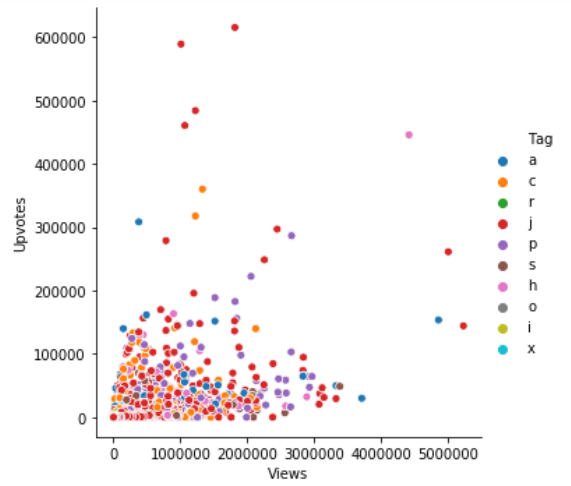

# **Hue Plot**

We can add another dimension in our plot with the help of hue as it gives color to the points and each color has some meaning attached to it.

In the above plot, the hue semantic is categorical. That’s why it has a different color palette. If the hue semantic is numeric, then the coloring becomes sequential.

1. sns.relplot(x="Views", y="Upvotes", hue = "Answers", data = df);

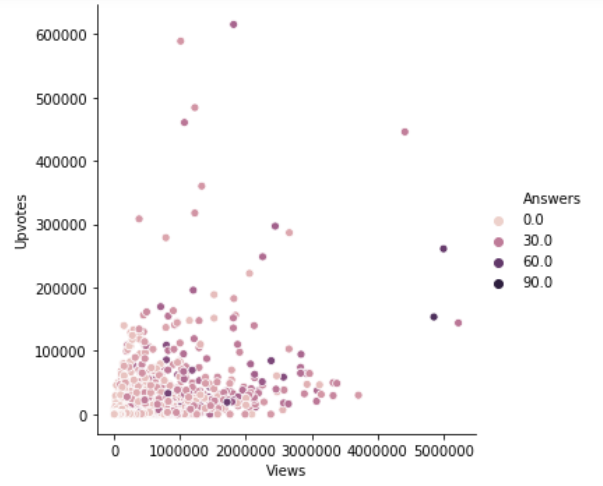

# ****Plotting Categorical Data****

1. Jitter
2. Hue
3. Boxplot
4. Voilin Plot
5. Pointplot

As per above plots, we saw how we can use different visual representations to show the relationship between multiple variables. We drew the plots between two numeric variables.

Here lets look more detail about the relationship between two variables of which one would be categorical (divided into different groups).

We’ll be using catplot() function of seaborn library to draw the plots of categorical data. Let’s dive in

# **1. Jitter Plot**

For jitter plot we’ll be using another dataset from the problem HR analysis challenge, let’s import the dataset now.

1. df2 = pd.read_csv(r"train.csv")
2. df2.head()

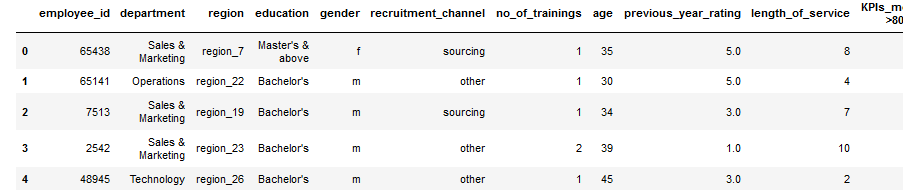

Now, we’ll see the plot between the columns education and avg_training_score by using catplot() function.

1. sns.catplot(x="education", y="avg_training_score", data=df2)

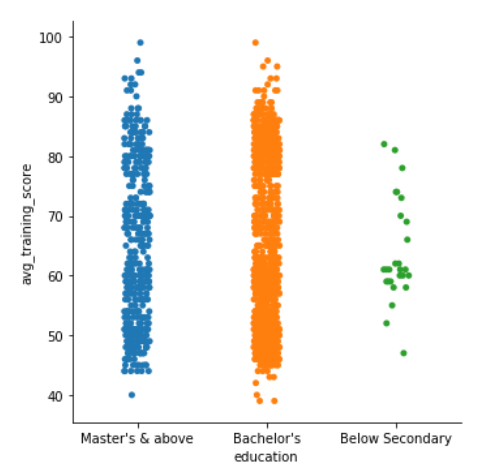

Since we can see that the plot is scattered, so to handle that, we can set the jitter to false. Jitter is the deviation from the true value. So, we’ll set the jitter to false by using another parameter.

1. sns.catplot(x="education", y="avg_training_score", jitter = False,  data=df2)

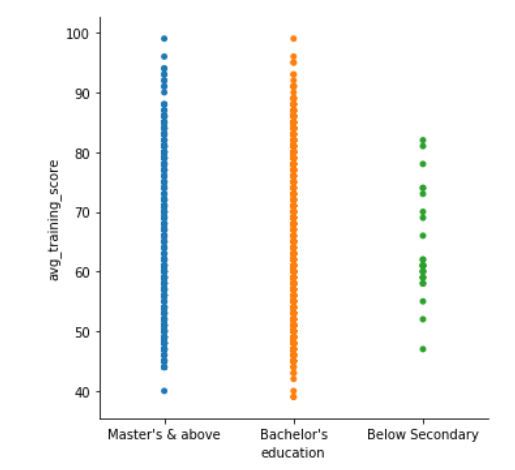

# **Hue Plot**

Next, if we want to introduce another variable or another dimension in our plot, we can use the hue parameter just like we used in the above plot.Let’s say we want to see the gender distribution in the plot of education and avg_training_score, to do that, we can use the following code

1. sns.catplot(x="education", y="avg_training_score", hue = "gender", data=df2)

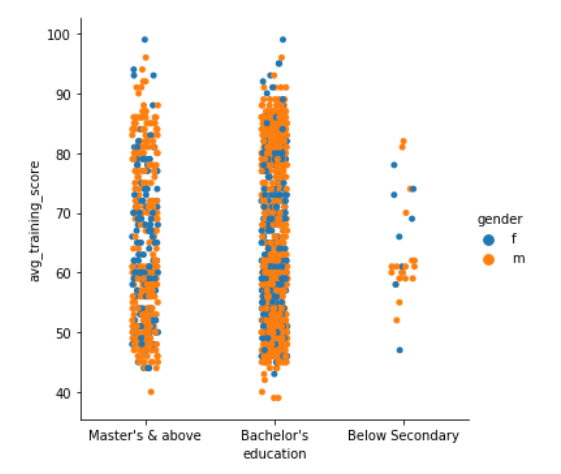

In the above plots, we can see that the points are overlapping each other, to eliminate this situation, we can set kind = “swarm”, swarm uses an algorithm that prevents the points from overlapping and adjusts the points along the categorical axis. Let’s see how it looks like-

1. sns.catplot(x="education", y="avg_training_score", kind = "swarm", data=df2)

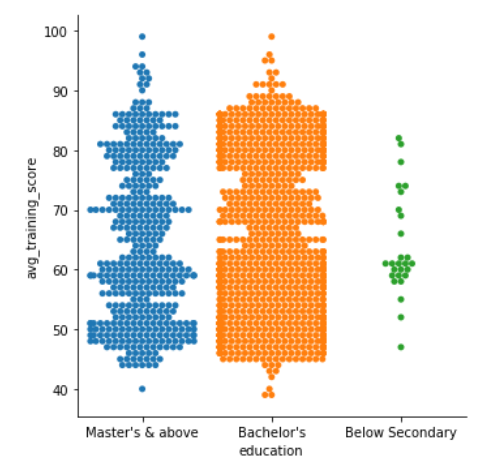

Pretty amazing, right? What if we want to see the swarmed version of the plot as well as a third dimension? Let’s see how it goes if we introduce is_promoted as a new variable

1. sns.catplot(x="education", y="avg_training_score", hue = "is_promoted", kind = "swarm", data=df2)

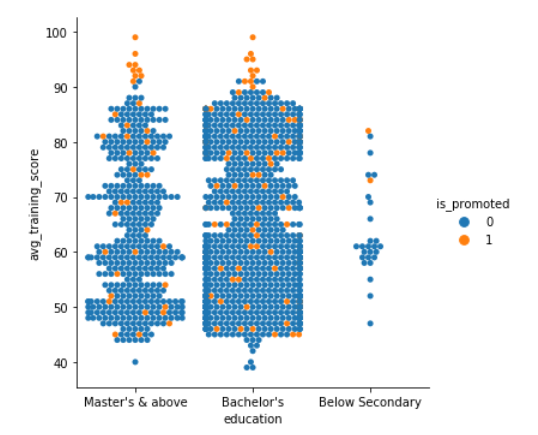

# **Boxplot using seaborn**

Another kind of plot we can draw is a boxplot which shows three quartile values of the distribution along with the end values. Each value in the boxplot corresponds to actual observation in the data. Let’s draw the boxplot now-

1. sns.catplot(x="education", y="avg_training_score", kind = "box", data=df2)

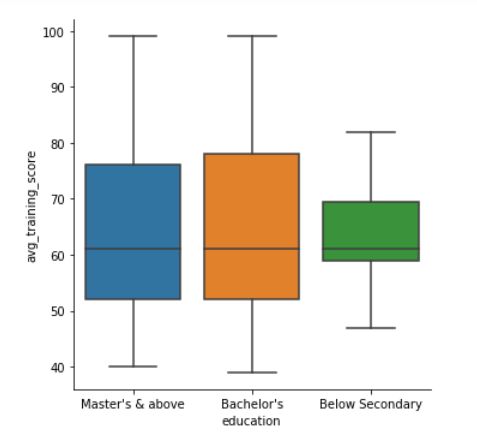

Boxplot operates on the full dataset and obtains the mean value by default. Let’s face it now.

1. sns.catplot(x="education", y="avg_training_score", hue = "is_promoted", kind = "bar", data=df2)

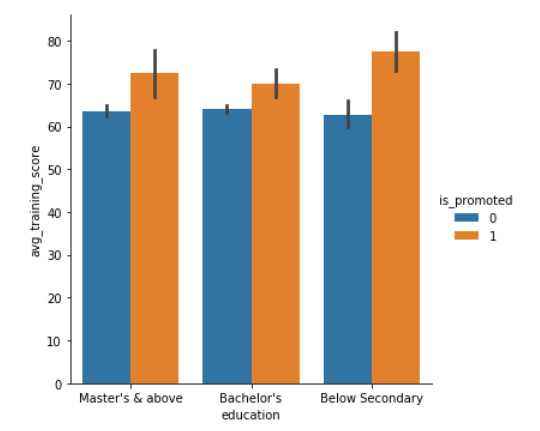

When we use hue semantic with boxplot, it is leveled along the categorical axis so they don’t overlap. The boxplot with hue would look like-

1. sns.catplot(x="education", y="avg_training_score", hue = "is_promoted", kind = "box", data=df2)

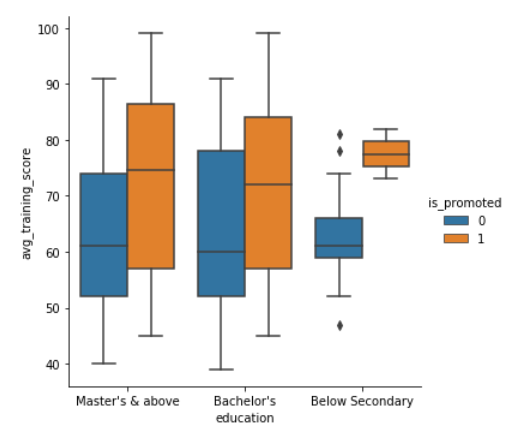

# **Violin Plot using seaborn**

We can also represent the above variables differently by using violin plots. Let’s try it out

1. sns.catplot(x="education", y="avg_training_score", hue = "is_promoted", kind = "violin", data=df2)

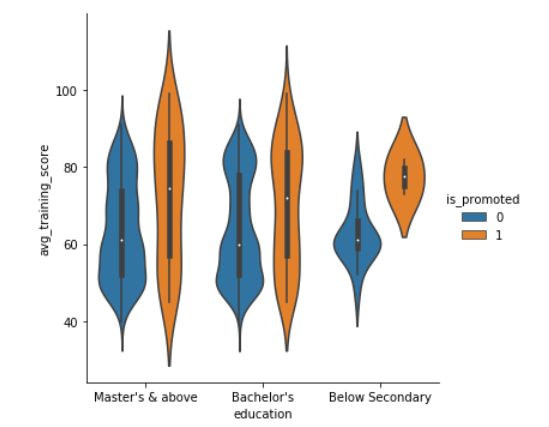

The violin plots combine the boxplot and kernel density estimation procedure to provide richer description of the distribution of values. The quartile values are displayed inside the violin. We can also split the violin when the hue semantic parameter has only two levels, which could also be helpful in saving space on the plot. Let’s look at the violin plot with a split of levels.

1. sns.catplot(x="education", y="avg_training_score", hue = "is_promoted", kind = "violin", split = True, data=df2)

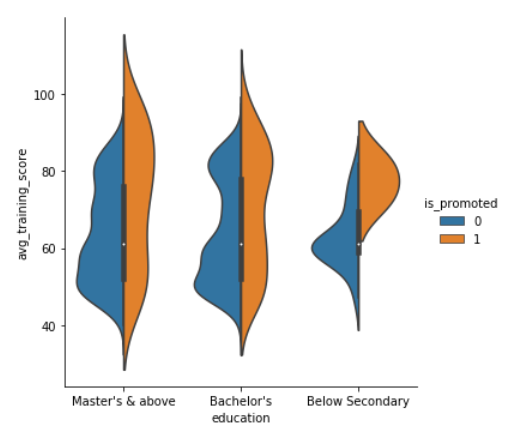

These amazing plots are the reason why I started using seaborn. It gives you a lot of options to display the data. Another coming in the line is boxplot.

# **Visualizing the Distribution of a Dataset**

Whenever we are dealing with a dataset, we want to know how the data or the variables are being distributed. Distribution of data could tell us a lot about the nature of the data, so let’s dive into it.

# **Plotting Univariate Distributions**

1. Histogram

One of the most common plots you’ll come across while examining the distribution of a variable is distplot. By default, distplot() function draws histogram and fits a Kernel Density Estimate. Let’s check out how age is distributed across the data.

sns.distplot(df2.age)

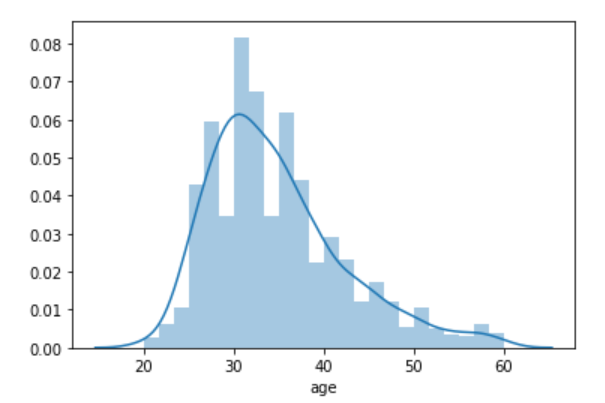

This clearly shows that the majority of people are in their late twenties and early thirties.

# Histogram using Seaborn

Another kind of plot that we use for univariate distribution is a histogram.

A histogram represents the distribution of data in the form of bins and uses bars to show the number of observations falling under each bin. We can also add a rugplot in it instead of using KDE (Kernel Density Estimate), which means at every observation, it will draw a small vertical stick.

1. sns.distplot(df2.age, kde=False, rug = True)

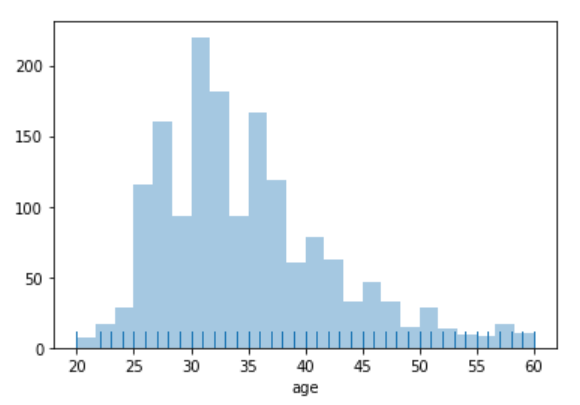

# Plotting Bivariate Distributions

1. Hexplot
2. KDE plot
3. Boxen plot
4. Ridge plot (Joyplot)

Apart from visualizing the distribution of a single variable, we can see how two independent variables are distributed with respect to each other. Bivariate means joint, so to visualize it, we use jointplot() function of seaborn library. By default, jointplot draws a scatter plot. Let’s check out the bivariate distribution between age and avg_training_score.

sns.jointplot(x="avg_training_score", y="age", data=df2);

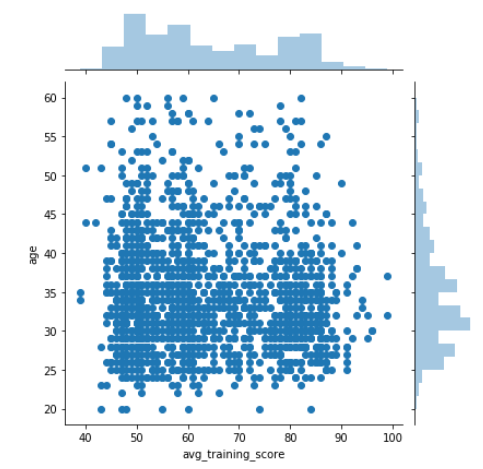

There are multiple ways to visualize bivariate distribution. Let’s look at a couple of more.

# Hexplot using Seaborn

Hexplot is a bivariate analog of histogram as it shows the number of observations that falls within hexagonal bins. This is a plot which works with large dataset very easily. To draw a hexplot, we’ll set kind attribute to hex. Let’s check it out now.

sns.jointplot(x=df2.age, y=df2.avg_training_score, kind="hex", data = df2)
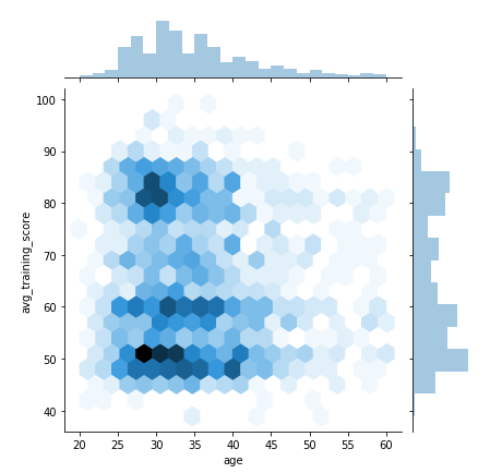

# KDE Plot using Seaborn
That’s not the end of this, next comes KDE plot. It’s another very awesome method to visualize the bivariate distribution. Let’s see how the above observations could also be achieved by using jointplot() function and setting the attribute kind to KDE.

sns.jointplot(x="age", y="avg_training_score", data=df2, kind="kde");
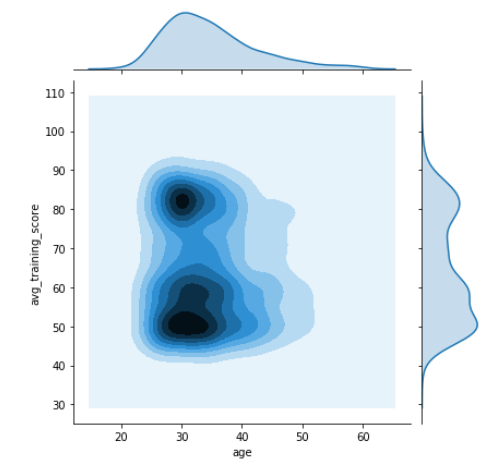

# Heatmaps using Seaborn
Now let’s talk about my absolute favorite plot, the heatmap. Heatmaps are graphical representations in which each variable is represented as a color.

Let’s go ahead and generate one:

1. corrmat = df2.corr()
2. f, ax = plt.subplots(figsize=(9, 6))
3. sns.heatmap(corrmat, vmax=.8, square=True)

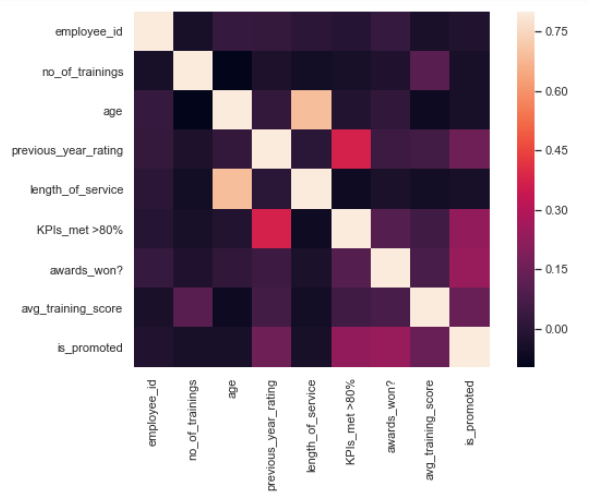

# Boxen Plot using Seaborn

Another plot that we can use to show the bivariate distribution is boxen plot. Boxen plots were originally named letter value plot as it shows large number of values of a variable, also known as quantiles. These quantiles are also defined as letter values. By plotting a large number of quantiles, provides more insights about the shape of the distribution. These are similar to box plots, let’s see how they could be used.

1. sns.catplot(x="age", y="avg_training_score", data=df2, kind="boxen",height=4, aspect=2.7, hue = "is_promoted")

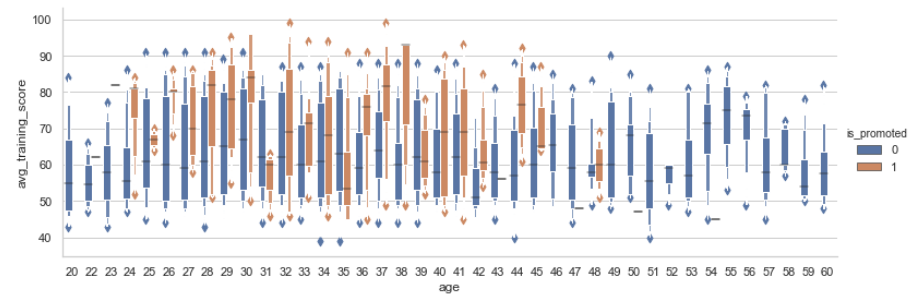

# Visualizing Pairwise Relationships in a Dataset

We can also plot multiple bivariate distributions in a dataset by using pairplot() function of the seaborn library. This shows the relationship between each column of the database. It also draws the univariate distribution plot of each variable on the diagonal axis. Let’s see how it looks.

1. sns.pairplot(df2)

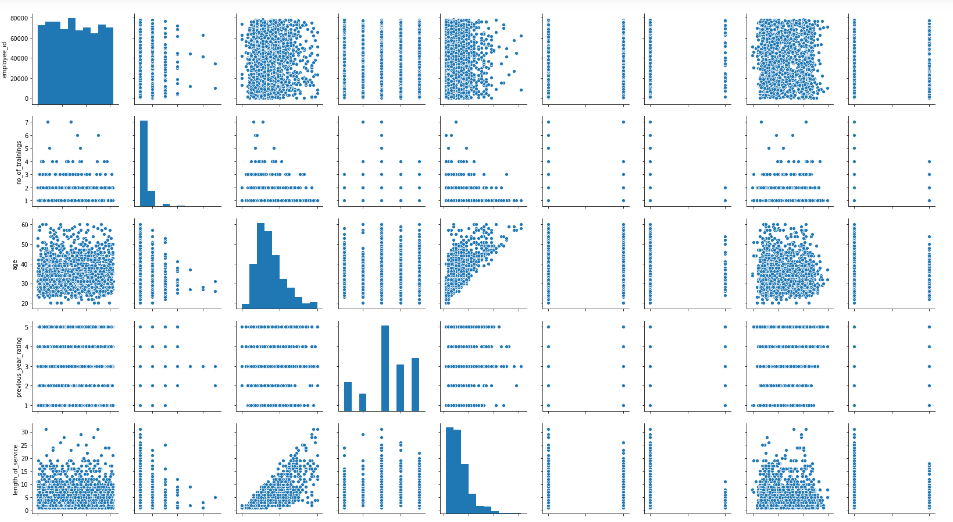

# **Plotting Univariate Distributions**

**Analyzing distplot funcation parameters**

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

a --- vector or 1-d array or list, which we need to perform series of object with a name attribute.

bins --- we already know. We are splitting the continues values into bar of intervels(pole kind of structure).

hist --- If true then histogram plot will be visible in grid and if False then histogram not visible in grid.

kde --- If False then KDE (Kernel Density Estimate), which means at every observation it will draw a small vertical stick. If  
        True then it will be visible like density plot.
        
rug --- Whether to draw a rugplot on the support axis. leave as default one.

fit --- fit parameter is optional so no need to customize.

hist_kws --- its a keyword argument for matplotlib.axes.Axes.hist(). We leave as default beacuse with hist parameter we are   
              handling histogram should be visible or invsible in grid.

kde_kws,rug_kws --- this 2 parameters is optional so dont customize it.

color --- this parameter will be used in matlab tool, So no changes outside matlab tool.

label -- if we want label for the plot customize it or else dont change....

axlabel --- if we want to customize the x-axis label then make as name 'name', else make false to take it from column name.

distplot() function is used to run only int and float data-types

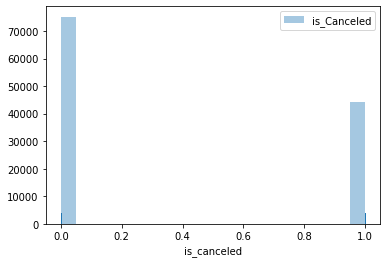

In [9]:
# if kde=False
sb.distplot(dataset['is_canceled'],bins=20,hist=True,kde=False,rug=True,label='is_Canceled',axlabel='is_canceled')

# If we use label parameter then legend function is mandatory or else label name wont show in grid..
plt.legend()
plt.show()

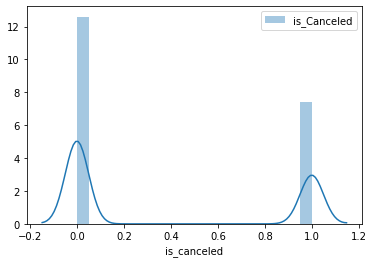

In [10]:
sb.distplot(dataset['is_canceled'],bins=20,hist=True,kde=True,label='is_Canceled')
plt.legend()
plt.show()

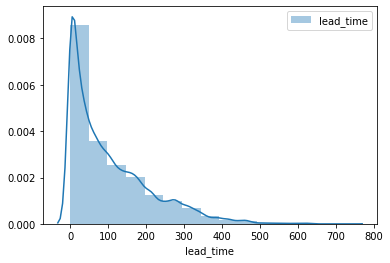

In [11]:
sb.distplot(dataset['lead_time'],bins=15,label='lead_time',hist=True,kde=True)
plt.legend()
plt.show()

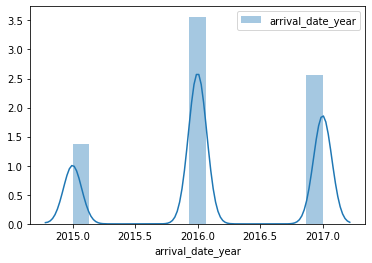

In [12]:
sb.distplot(dataset['arrival_date_year'],label='arrival_date_year',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

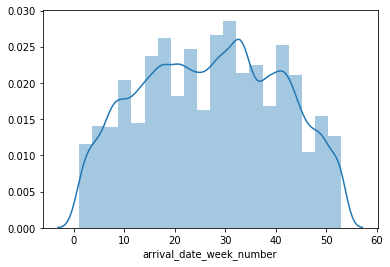

In [13]:
sb.distplot(dataset['arrival_date_week_number'],label='arrival_date_week_number',bins=20,hist=True,kde=True)

[]

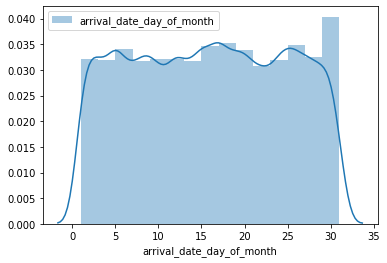

In [14]:
sb.distplot(dataset['arrival_date_day_of_month'],label='arrival_date_day_of_month',bins=15,hist=True,kde=True)
plt.legend()
plt.plot()

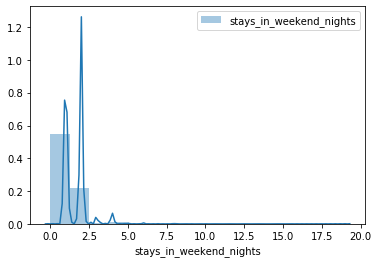

In [15]:
sb.distplot(dataset['stays_in_weekend_nights'],label='stays_in_weekend_nights',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

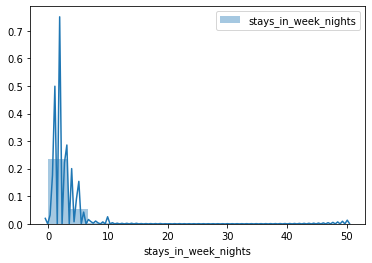

In [16]:
sb.distplot(dataset['stays_in_week_nights'],label='stays_in_week_nights',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

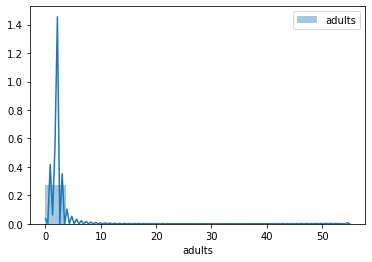

In [17]:
sb.distplot(dataset['adults'],label='adults',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

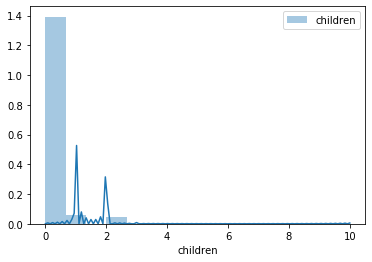

In [18]:
sb.distplot(dataset['children'],label='children',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

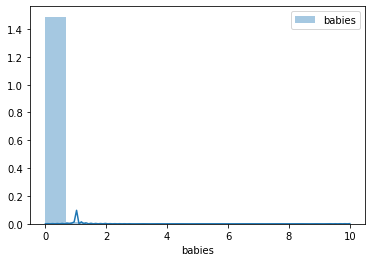

In [19]:
sb.distplot(dataset['babies'],label='babies',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

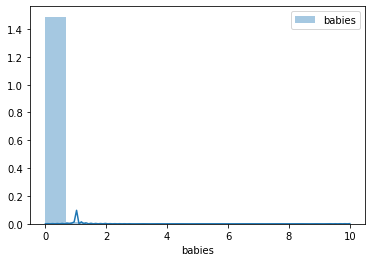

In [20]:
sb.distplot(dataset['babies'],label='babies',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

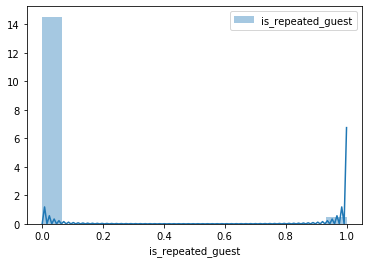

In [21]:
sb.distplot(dataset['is_repeated_guest'],label='is_repeated_guest',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

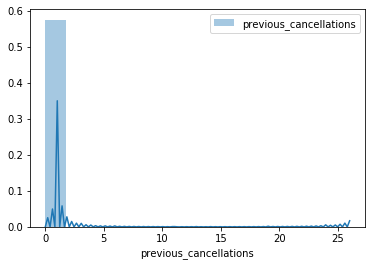

In [22]:
sb.distplot(dataset['previous_cancellations'],label='previous_cancellations',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

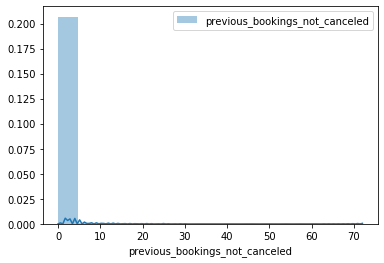

In [23]:
sb.distplot(dataset['previous_bookings_not_canceled'],label='previous_bookings_not_canceled',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

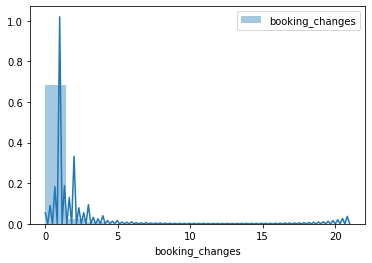

In [24]:
sb.distplot(dataset['booking_changes'],label='booking_changes',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

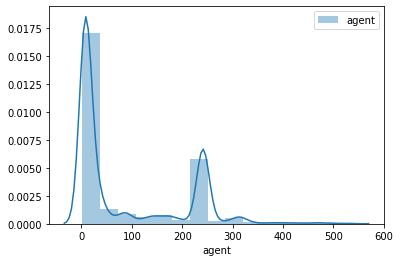

In [25]:
sb.distplot(dataset['agent'],label='agent',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

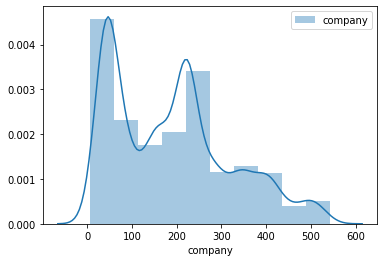

In [26]:
sb.distplot(dataset['company'],label='company',bins=10,hist=True,kde=True)
plt.legend()
plt.show()

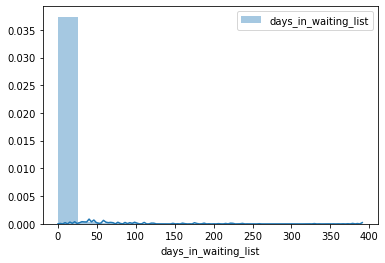

In [27]:
sb.distplot(dataset['days_in_waiting_list'],label='days_in_waiting_list',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

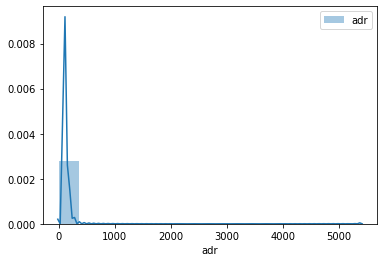

In [28]:
sb.distplot(dataset['adr'],label='adr',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

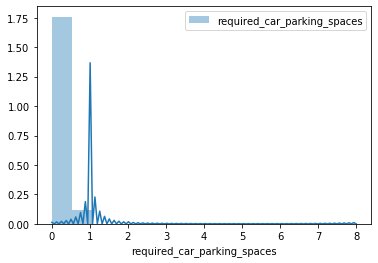

In [29]:
sb.distplot(dataset['required_car_parking_spaces'],label='required_car_parking_spaces',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

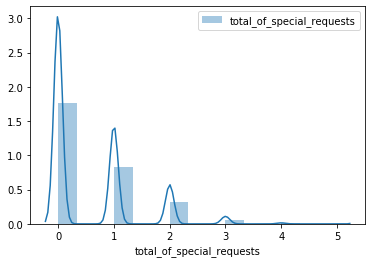

In [30]:
sb.distplot(dataset['total_of_special_requests'],label='total_of_special_requests',bins=15,hist=True,kde=True)
plt.legend()
plt.show()

# **2. Feature Engineering**

# **Imputation or Data Cleaning**

Data cleaning is the important technique to remove null values.

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [32]:
dataset.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Checking the missing value ratio**

In [33]:
dataset_null=(dataset.isna().sum()/len(dataset))*100.0

dataset_null_ratio=dataset_null.drop(dataset_null[dataset_null==0].index).sort_values(ascending=False)

print(dataset_null_ratio)

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64


As per above missing value ratio company column have 94.3% of missing values. instead of replacing remove that column.

country is a object data-type, so we are dropping rows w.r.t country missing values.

In [34]:
# Dropping company column attribute

dataset=dataset.drop('company',axis=1)
dataset.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [35]:
# Replacing all non object column attribute missing values as mean
dataset=dataset.fillna(dataset.mean())

In [36]:
# Now dropping all object releated missing values by using dropna() function.

dataset=dataset.dropna(axis=0)
dataset.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

As per above  output info its clear that we dont have any missing values in our dataset.

Lets check dataset.info() and missing ration after handled all missing vlaues with different techniques like drop column, drop row and replace with mean of that column attribute.

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 31 columns):
hotel                             118902 non-null object
is_canceled                       118902 non-null int64
lead_time                         118902 non-null int64
arrival_date_year                 118902 non-null int64
arrival_date_month                118902 non-null object
arrival_date_week_number          118902 non-null int64
arrival_date_day_of_month         118902 non-null int64
stays_in_weekend_nights           118902 non-null int64
stays_in_week_nights              118902 non-null int64
adults                            118902 non-null int64
children                          118902 non-null float64
babies                            118902 non-null int64
meal                              118902 non-null object
country                           118902 non-null object
market_segment                    118902 non-null object
distribution_channel              118902 n

In [38]:
dataset_null1=(dataset.isna().sum()/len(dataset))*100.0

dataset_null_ratio1=dataset_null1.drop(dataset_null1[dataset_null1==0].index).sort_values(ascending=False)

print(dataset_null_ratio1)

Series([], dtype: float64)


As per above output its clear that we dont have any missing column attribute, so its showing blank column attribute

# **3. EDA (Extraordinary Data Analysis)**

#  **Label Encoder**

Encoding the categorical value into numerical value

**Without DataFrame:**

If we already converted dataset from dataframe into array vector, With the help of sklearn library we can eassly convert categorical to numerical

1. from sklear.preprocessing import LabelEncoder
2. label=LabelEncoder()
3. dataset[:,2] = label.fit_transform(dataset[:,2]) --- encoding sex attribute 
4. dataset[:,6] = label.fit_transform(dataset[:,6]) --- encoding ticket attribute
5. dataset[:,8] = label.fit_transform(dataset[:,8]) --- encoding embarked attribute
6. dataset.head()

see result all those attribute are encoded with numerical values. then safely we can go ahead.


**With Dataframe:**

If we not yet converted dataset from dataframe to array of vector then label encoding technique we should use uniquly.....

Here also we can use 2 techniques,

**First technique(mannual technique):** If we have more than 100 attribute it will hard to follow this technique

1. dataset['Sex'].unqiue()---- We will get different kind of text like male and female
2. dataset['sex']=dataset['sex'].map({'male':0,'female':1}) --- we mapped male the male value as 0 and female value as 1...
3. dataset.head() ---- we can check those text update with numerics....

**Second technique ( Automatic technique) :** This technique use sklearn library.....

1. from sklearn.preprocessing import LabelEncoder
2. label=LabelEncoder()
3. dataset['sex']=label.fit_transform(dataset['sex'])----it look bit simlar with above code but this syntax uses for dataframe
4. dataset.head() ----- we can check those text update with numerics....

**Technique 1**

In [39]:
dataset1=dataset
dataset1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [40]:
dataset1['hotel']=dataset1['hotel'].map({'Resort Hotel':0,'City Hotel':1})
dataset1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Technique 2**

In [41]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

dataset1['arrival_date_month']=label.fit_transform(dataset1['arrival_date_month'])
dataset1['meal']=label.fit_transform(dataset1['meal'])
dataset1['country']=label.fit_transform(dataset1['country'])
dataset1['market_segment']=label.fit_transform(dataset1['market_segment'])
dataset1['distribution_channel']=label.fit_transform(dataset1['distribution_channel'])
dataset1['reserved_room_type']=label.fit_transform(dataset1['reserved_room_type'])
dataset1['assigned_room_type']=label.fit_transform(dataset1['assigned_room_type'])
dataset1['deposit_type']=label.fit_transform(dataset1['deposit_type'])
dataset1['customer_type']=label.fit_transform(dataset1['customer_type'])
dataset1['reservation_status']=label.fit_transform(dataset1['reservation_status'])
dataset1['reservation_status_date']=label.fit_transform(dataset1['reservation_status_date'])

In [42]:
dataset1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,5,27,1,0,0,2,...,3,0,86.693382,0,2,0.0,0,0,1,121
1,0,0,737,2015,5,27,1,0,0,2,...,4,0,86.693382,0,2,0.0,0,0,1,121
2,0,0,7,2015,5,27,1,0,1,1,...,0,0,86.693382,0,2,75.0,0,0,1,122
3,0,0,13,2015,5,27,1,0,1,1,...,0,0,304.000000,0,2,75.0,0,0,1,122
4,0,0,14,2015,5,27,1,0,2,2,...,0,0,240.000000,0,2,98.0,0,1,1,123


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 31 columns):
hotel                             118902 non-null int64
is_canceled                       118902 non-null int64
lead_time                         118902 non-null int64
arrival_date_year                 118902 non-null int64
arrival_date_month                118902 non-null int32
arrival_date_week_number          118902 non-null int64
arrival_date_day_of_month         118902 non-null int64
stays_in_weekend_nights           118902 non-null int64
stays_in_week_nights              118902 non-null int64
adults                            118902 non-null int64
children                          118902 non-null float64
babies                            118902 non-null int64
meal                              118902 non-null int32
country                           118902 non-null int32
market_segment                    118902 non-null int32
distribution_channel              118902 non-nu

We converted all categorical values into numerical values as per above dataset.info(). There is no object data-type.

# **OneHotEncoder ( Encoding numerical values in dummy values)**

One hot encoder is very useful to encode value from numerical values into dummy values...like we have 1,2,3,4 different kind of values in an attribute.. So by applying onehot encoder it will create 3 attribute like binary code( 1- 0 0 1, 2 - 0 1 0, 3 - 0 1 1, 4- 1 0 0) likewise.

It will be a good technique, if we have few number of numerical values. so dummy values attribute will create few only. suppose if you have more then 100 numerica value then dummy attribute will increase gradually. dimensation and vector quantity will increase rapidely.

onehotencoder having an issue with dummy variable trap. to handle, we need to perform this logic (dummy attribute=1-total dummy attributes).

so better we use feature scaling it will rescale all values from different range to same range -1 to 1 or 0 to 1....

# **Handling Outliers**

Now, I'm going to identify outlier between output attribute w.r.t input attribute.

1. Here we can visualise correlation using scatter plot from matplotlib and relplot from seaborn, we can use both its upto us what kind of visualisation we need dark dots or light dark dots.

2. In classification outlier will be very few. I'm not going to plot all output attribute with input attributes. I'm just going to plot output attribute with numerical values and not plotting with binary values and some data which it will only show dots for 0's and 1's place. So better we can focus on numeric uniqe values.

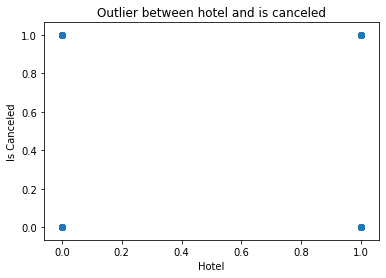

In [56]:
plt.scatter(dataset1['hotel'],dataset1['is_canceled'])
plt.xlabel('Hotel')
plt.ylabel('Is Canceled')
plt.title('Outlier between hotel and is canceled')
plt.show()

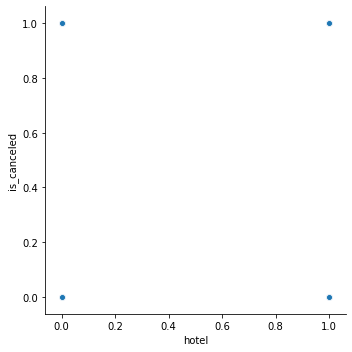

In [58]:
sb.relplot(x='hotel',y='is_canceled',data=dataset1)

If we have binary data then outcome will come like above plot. so please check before plotting the outliers.

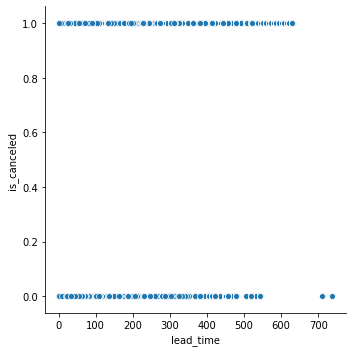

In [59]:
sb.relplot(x='lead_time',y='is_canceled',data=dataset1)

So w.r.t lead_time at outcome 0's we have outlier. Now i'm going to remove the outlier after 600 lead time.

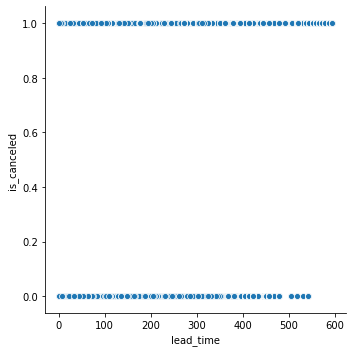

In [60]:
dataset1=dataset1.drop(dataset1[dataset['lead_time']>600].index)

sb.relplot(x='lead_time',y='is_canceled',data=dataset1)

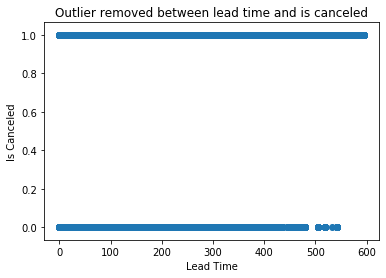

In [61]:
plt.scatter(dataset1['lead_time'],dataset1['is_canceled'])
plt.xlabel('Lead Time')
plt.ylabel('Is Canceled')
plt.title('Outlier removed between lead time and is canceled')
plt.show()

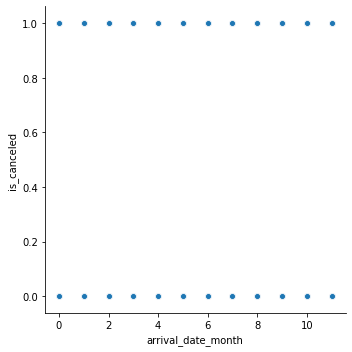

In [62]:
sb.relplot(x='arrival_date_month',y='is_canceled',data=dataset1)

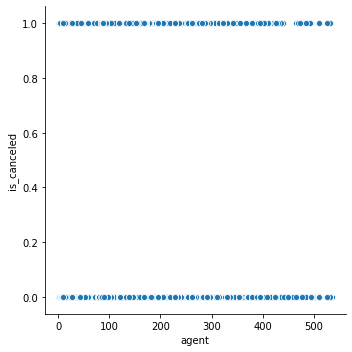

In [63]:
sb.relplot(x='agent',y='is_canceled',data=dataset1)

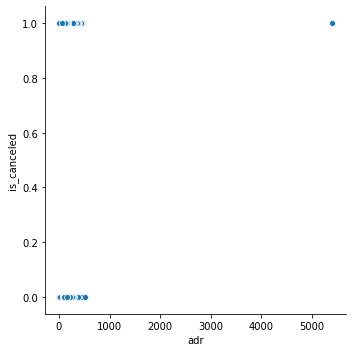

In [65]:
sb.relplot(x='adr',y='is_canceled',data=dataset1)

Removing all adr values after 1000..

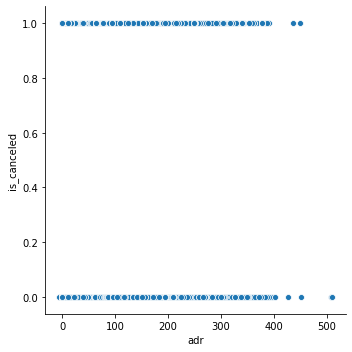

In [66]:
dataset1=dataset1.drop(dataset1[dataset1['adr']>900].index)

sb.relplot(x='adr',y='is_canceled',data=dataset1)

Again removing outlier after 420 value in adr.

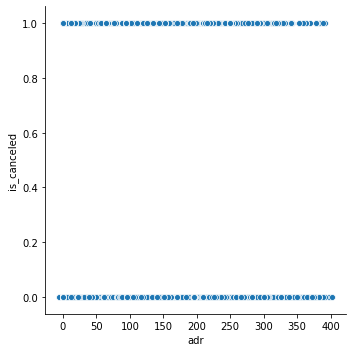

In [67]:
dataset1=dataset1.drop(dataset1[dataset1['adr']>420].index)

sb.relplot(x='adr',y='is_canceled',data=dataset1)

Now we dont have any outlier for adr attribute w.r.t is_canceled output attribute

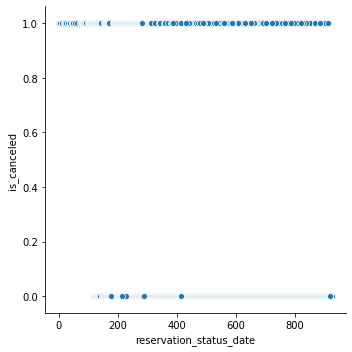

In [68]:
sb.relplot(x='reservation_status_date',y='is_canceled',data=dataset1)

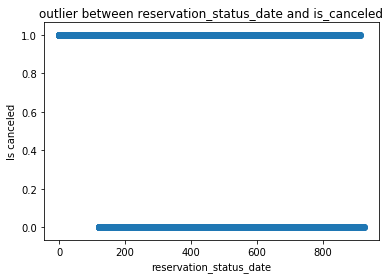

In [70]:
plt.scatter(dataset1['reservation_status_date'],dataset1['is_canceled'])
plt.xlabel('reservation_status_date')
plt.ylabel('Is canceled')
plt.title('outlier between reservation_status_date and is_canceled')
plt.show()

As per above plot less 100 values from reservation_status_date dataset need to deleted... we have identified outlier before 100 value...

because only 1's started from 0 and 0's some where around 160 something... so better remove previous values.... For better accuracy from our model...

In [71]:
dataset1=dataset1.drop(dataset1[dataset1['reservation_status_date']<120].index)

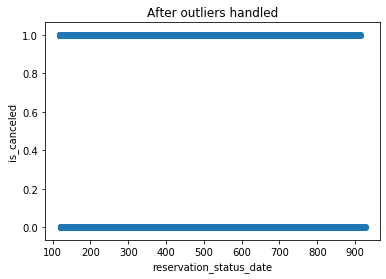

In [72]:
plt.scatter(dataset1['reservation_status_date'],dataset1['is_canceled'])
plt.xlabel('reservation_status_date')
plt.ylabel('is_canceled')
plt.title('After outliers handled')
plt.show()

As per above reservation_status_date found imbalanced dataset. because we have more data on 1's and few data on 0's. So now we are going to balance it by 50/50

# **Converting Imbalance Dataset to Balanced Dataset**

Converting the dataset from imbalanced to balanced.... lets check the ratio between 0's and 1's data row percentage and then balance the dataset

In [74]:
# Separating booking class distribution canceled and non-canceled dataset

booking_non_canceled=(dataset1['is_canceled'].value_counts()[0]/len(dataset1))*100.0
booking_canceled=(dataset1['is_canceled'].value_counts()[1]/len(dataset1))*100.0

print('Booking non canceled dataset ratio: %f'%(booking_canceled))
print('Booking canceled dataset ratio: %f'%(booking_non_canceled))
print('Booking non canceled dataset total rows: %f'%(dataset1['is_canceled'].value_counts()[0]))
print('Booking canceled dataset total rows:%f'%(dataset1['is_canceled'].value_counts()[1]))

Booking non canceled dataset ratio: 35.830378
Booking canceled dataset ratio: 64.169622
Booking non canceled dataset total rows: 74739.000000
Booking canceled dataset total rows:41732.000000


**Visualising the canceled and non canceled dataset percentages (Class Distirbution)**

Text(0.5, 1.0, ' Class Distribution \n( 0-Non Canceled || 1-Canceled)')

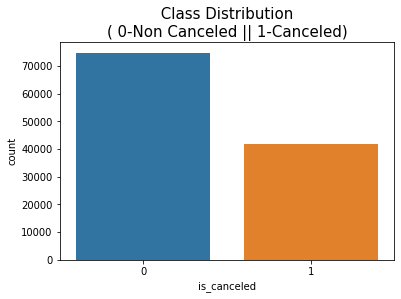

In [78]:
sb.countplot('is_canceled',data=dataset1)
plt.title(" Class Distribution \n( 0-Non Canceled || 1-Canceled)",fontsize=15)

As per above count plot. We have 35.8% of canceled data rows and 64.16% of non canceled data row... In terms of row number we have 41732 canceled data rows and 74739 non canceled data rows...

Now we need to balanced by using technique called under-sample, Then we removee few random rows to reach non canceled data rows from 74739 to 41732 rows of data.... So all canceled and non canceled data row will be equal like 50/50......

In [84]:
# Booking Canceled data rows

booking_canceled_data=dataset1.loc[dataset1['is_canceled']==1]

# Booking non canceled data rows

booking_non_canceled_data=dataset1.loc[dataset1['is_canceled']==0][:41732]

# concat both canceled and non canceled dataset

concated_dataset=pd.concat([booking_canceled_data,booking_non_canceled_data])

# shuffle all balanced dataset

balanced_dataset=concated_dataset.sample(frac=1,random_state=5)

balanced_dataset.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
62112,1,1,71,2017,4,1,2,1,2,2,...,0,0,9.000000,0,2,102.6,0,2,0,646
23753,0,0,43,2016,0,18,30,1,1,2,...,0,0,240.000000,0,3,90.0,0,1,1,427
39211,0,0,49,2017,1,32,8,0,3,1,...,0,0,86.693382,0,1,135.0,0,1,1,893
907,0,0,1,2015,1,32,5,0,0,3,...,0,0,240.000000,0,2,0.0,0,2,1,156
10108,0,1,134,2017,3,7,12,4,10,2,...,0,0,86.693382,0,2,26.0,0,0,0,579


**Visualising again whether data is balanced or not**

In [85]:
# booking canceled balanced dataset ratio

booking_canceled_balanced_dataratio=(balanced_dataset['is_canceled'].value_counts()[1]/len(balanced_dataset))*100.0

#booking non canceled balanced dataset ratio

booking_non_canceled_balanced_dataratio=(balanced_dataset['is_canceled'].value_counts()[0]/len(balanced_dataset))*100.0

print('Booking canceled balanced dataset ratio : %f'%(booking_canceled_balanced_dataratio))
print('Booking non canceled balanced dataset ratio : %f'%(booking_non_canceled_balanced_dataratio))
print('Booking canceled balanced dataset row count : %f'%(balanced_dataset['is_canceled'].value_counts()[1]))
print('Booking non canceled balanced dataset row count : %f '%(balanced_dataset['is_canceled'].value_counts()[0]))

Booking canceled balanced dataset ratio : 50.000000
Booking non canceled balanced dataset ratio : 50.000000
Booking canceled balanced dataset row count : 41732.000000
Booking non canceled balanced dataset row count : 41732.000000 


Above output clear say we have 50/50 balanced datset....Lets visualise it....

Text(0.5, 1.0, 'Class Distribution \n(0-Non Canceled Booking || 1- Canceled bookings)')

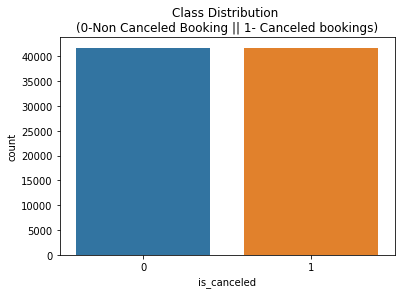

In [88]:
sb.countplot('is_canceled',data=balanced_dataset)
plt.title('Class Distribution \n(0-Non Canceled Booking || 1- Canceled bookings)')

We balanced our dataset lets goahead with other techniques

# **Feature Scaling**

I will do feature scaling technique while selecting the model using pipeline technique...

# **4. Data Visualisation**